1. ANALISIS EXPLORATORIO

Importamos las librerias necesarias

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




Cargamos los csv del dataset Red Wine Quality

In [79]:

df = pd.read_csv('winequality-red.csv')


Analisis de Dataset Red Wine Quality: winequality-red.csv

In [80]:

print("\nInformacion del csv winequality-red.csv")
print(df.head())
print(df.info())
print(df.describe())



Informacion del csv winequality-red.csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1

Identificamos la correlacion entre las variables


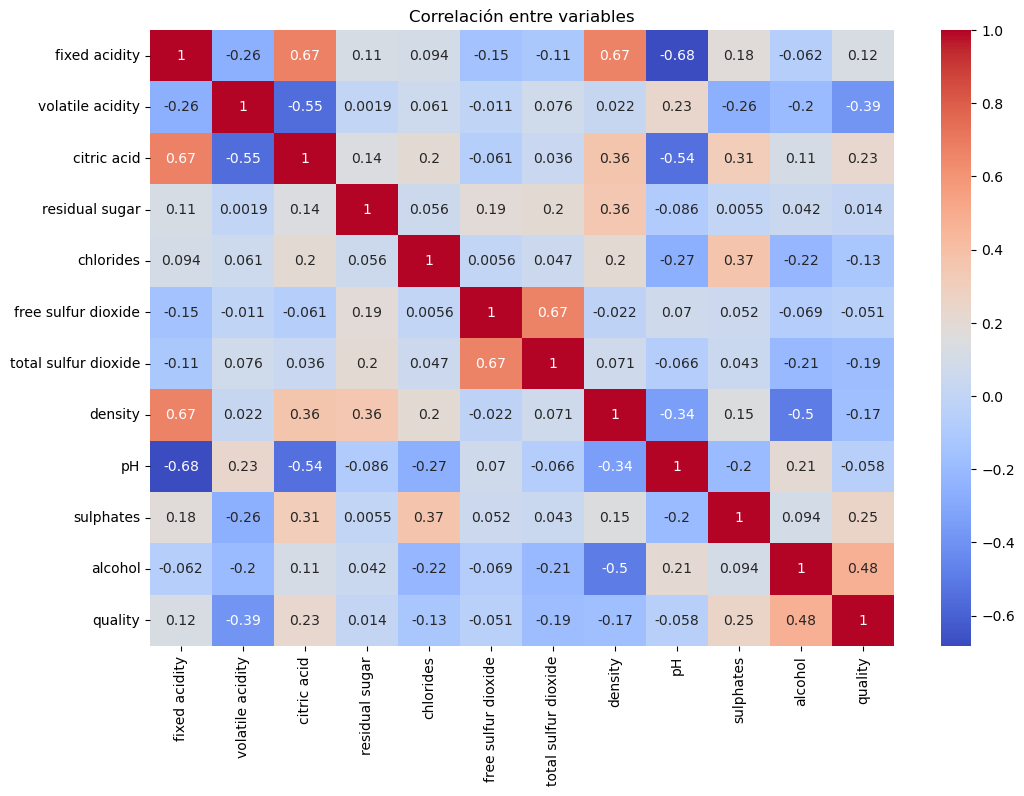

In [81]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables")
plt.show()

Analizamos la distribucion de la variable quality

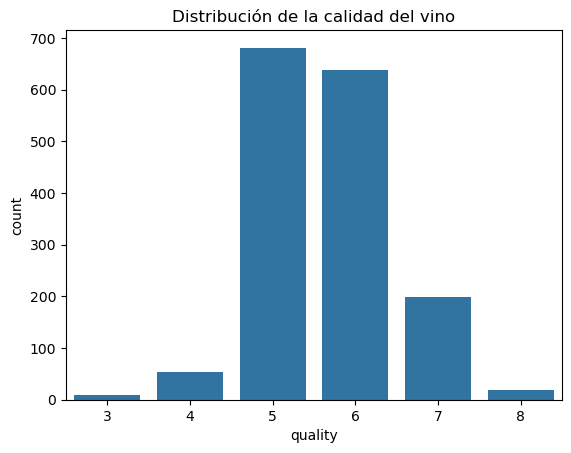

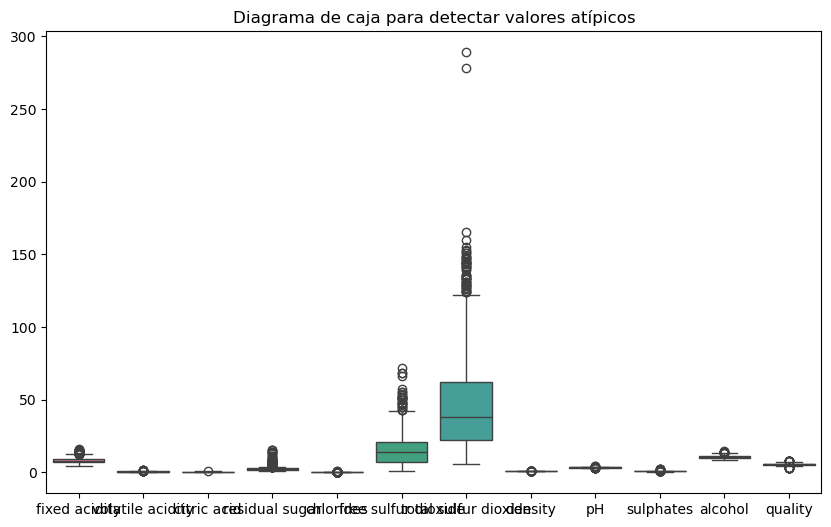

In [82]:
sns.countplot(data=df, x='quality')
plt.title("Distribución de la calidad del vino")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title('Diagrama de caja para detectar valores atípicos')
plt.show()

2. REPROCESAR LOS DATOS

In [83]:

# Verificar valores nulos
print("Valores nulos:\n", df.isnull().sum())




Valores nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Transformamos los datos para categorizarlos

In [84]:
# Utilizamos el rango intercuartílico para identificar valores atípicos y reemplazarlos si es necesario.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Reemplazar valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] con los límites
df_cleaned = df.copy()
for col in df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_cleaned[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df_cleaned[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# excluimos la variable 'quality'
scaler = StandardScaler()
features = df_cleaned.drop('quality', axis=1)
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame o csv con las características escaladas
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df_cleaned['quality']

# visualizamos el dataset reprocesado
df_scaled.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.538197,0.997591,-1.392540,-0.693182,-0.287014,-0.476813,-0.385806,0.581260,1.325970,-0.655496,-0.966950,5.0
1,-0.296555,2.032132,-1.392540,0.455672,0.938893,0.946759,0.700988,0.037896,-0.729187,0.220142,-0.587615,5.0
2,-0.296555,1.342438,-1.186940,-0.036694,0.604555,-0.070078,0.272857,0.146569,-0.331415,0.001232,-0.587615,5.0
3,1.757401,-1.416339,1.485857,-0.693182,-0.342737,0.133289,0.470456,0.689933,-0.994368,-0.509557,-0.587615,6.0
4,-0.538197,0.997591,-1.392540,-0.693182,-0.287014,-0.476813,-0.385806,0.581260,1.325970,-0.655496,-0.966950,5.0


3. SELECCIONAR LAS CARACTERÍSTICAS MÁS RELEVANTES PARA ENTRENAR EL MODELO UTILIZANDO SELECCIÓN DE CARACTERÍSTICAS.


In [85]:

# Definir X y y
X = df.drop("quality", axis=1)

# Convertir la variable 'quality' en categorías
y = pd.cut(df["quality"], bins=[0, 5, 7, 10], labels=["low", "medium", "high"])

# Calculamos la importancia de las características
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

# Visualizamos la importancia de las características
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# visualizamos la importancia de las características
print(feat_importances)






alcohol                 0.177845
sulphates               0.113508
total sulfur dioxide    0.104816
volatile acidity        0.104789
density                 0.080799
citric acid             0.074820
chlorides               0.070186
pH                      0.069226
fixed acidity           0.068918
residual sugar          0.068474
free sulfur dioxide     0.066620
dtype: float64


4. DIVIDIR EL DATASET EN TRAIN Y TEST (Divide los datos en conjuntos de entrenamiento y prueba (80%-20%).)


In [86]:

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. ENTRENAR EL MODELO CONFIGURANDO HIPERPARÁMETROS

In [87]:

# Definir el modelo
dt_model = DecisionTreeClassifier(random_state=42)

# Hiperparámetros a probar
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda de la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}



6. EVALUAR EL DESEMPEÑO DEL MODELO


In [88]:

# Predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))



Accuracy: 0.703125
Reporte de clasificación:
               precision    recall  f1-score   support

        high       0.12      0.20      0.15         5
         low       0.69      0.72      0.71       141
      medium       0.74      0.70      0.72       174

    accuracy                           0.70       320
   macro avg       0.52      0.54      0.53       320
weighted avg       0.71      0.70      0.71       320



7. GRAFICAMOS LA MATRIZ DE CONFUSION

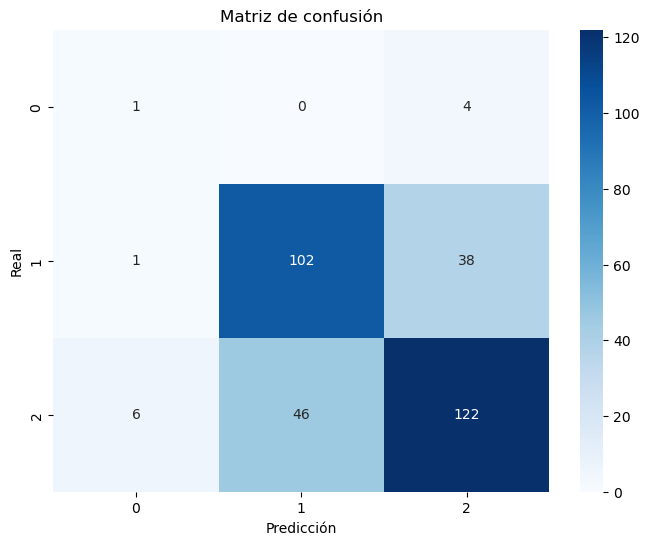

In [89]:

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()